## Proyecto Ciencia de Datos en Python Fabián Hernández 18003299

Importo paquetes necesarios para el proyecto

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [66]:
# Cargo datos usando la funcion load de numpy 
data = np.load('proyecto_training_data.npy')
mascara = np.random.rand(len(data)) <= 0.8
data_training = data[mascara]
data_test = data[~mascara]

Obtengo datos de cada columna del dataset

In [67]:
sale_price = data_training[:,0]
OverallQual = data_training[:,1]
stFLsf = data_training[:,2]
TotalRmsAbvGrd = data_training[:,3]
YearBuilt = data_training[:,4]
LotFrontage = data_training[:,5]
newLotFrontage = LotFrontage[~np.isnan(LotFrontage)]

3. Obtengo media, maximo, minimo, rango y desviacion estandar de cada dato 

In [68]:
list_mean = [np.mean(sale_price),np.mean(OverallQual),np.mean(stFLsf),np.mean(TotalRmsAbvGrd),np.mean(YearBuilt),np.nanmean(newLotFrontage)]
list_max = [np.max(sale_price),np.max(OverallQual),np.max(stFLsf),np.max(TotalRmsAbvGrd),np.max(YearBuilt),np.nanmax(newLotFrontage)]
list_min = [np.min(sale_price),np.min(OverallQual),np.min(stFLsf),np.min(TotalRmsAbvGrd),np.min(YearBuilt),np.nanmin(newLotFrontage)]
list_range = [np.ptp(sale_price),np.ptp(OverallQual),np.ptp(stFLsf),np.ptp(TotalRmsAbvGrd),np.ptp(YearBuilt),np.ptp(newLotFrontage)]
list_std = [np.std(sale_price),np.std(OverallQual),np.std(stFLsf),np.std(TotalRmsAbvGrd),np.std(YearBuilt),np.nanstd(newLotFrontage)]
list_campos = ["Property's sale price in dollars","Overall material and finish quality","First Floor square feet","Total rooms above grade","Original construction date","Linear feet of street connected to property"]
for x in range(0,6):
    print(f"Para el campo {list_campos[x]} la media es de: {list_mean[x]}, el valor maximo es de {list_max[x]}, el valor minimo es de {list_min[x]}, el rango es de {list_range[x]}, la desviacion estandar es de: {list_std[x]}\n")


 

Para el campo Property's sale price in dollars la media es de: 181672.3206751055, el valor maximo es de 755000.0, el valor minimo es de 34900.0, el rango es de 720100.0, la desviacion estandar es de: 80841.34652250313

Para el campo Overall material and finish quality la media es de: 6.119831223628692, el valor maximo es de 10.0, el valor minimo es de 1.0, el rango es de 9.0, la desviacion estandar es de: 1.3861837745214751

Para el campo First Floor square feet la media es de: 1167.698734177215, el valor maximo es de 4692.0, el valor minimo es de 372.0, el rango es de 4320.0, la desviacion estandar es de: 390.66334741188086

Para el campo Total rooms above grade la media es de: 6.530801687763713, el valor maximo es de 14.0, el valor minimo es de 3.0, el rango es de 11.0, la desviacion estandar es de: 1.6338006061291166

Para el campo Original construction date la media es de: 1970.8616033755275, el valor maximo es de 2010.0, el valor minimo es de 1872.0, el rango es de 138.0, la desvi

4. Para cada variable en el dataset usar seaborn(función distplot para graficar un histograma de la variable)

[Text(0.5, 1.0, "Property's sale price in dollars")]

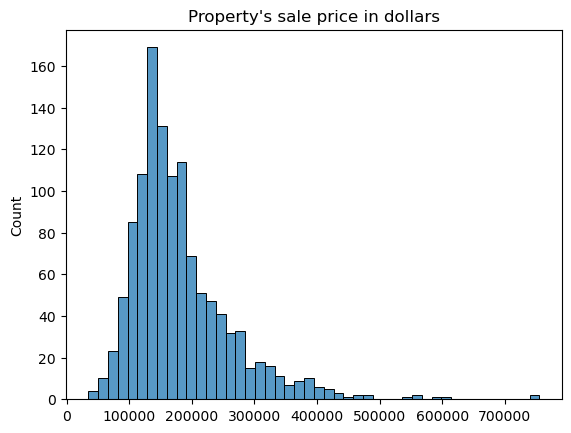

In [69]:
sns.histplot(data=sale_price).set(title="Property's sale price in dollars")


[Text(0.5, 1.0, 'Overall material and finish quality')]

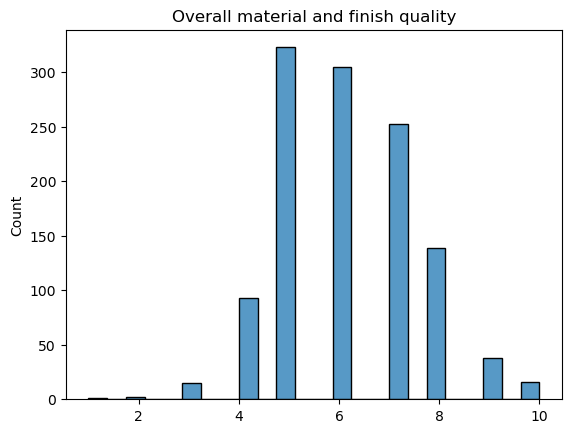

In [70]:
sns.histplot(data=OverallQual).set(title='Overall material and finish quality')

[Text(0.5, 1.0, 'First Floor square feet')]

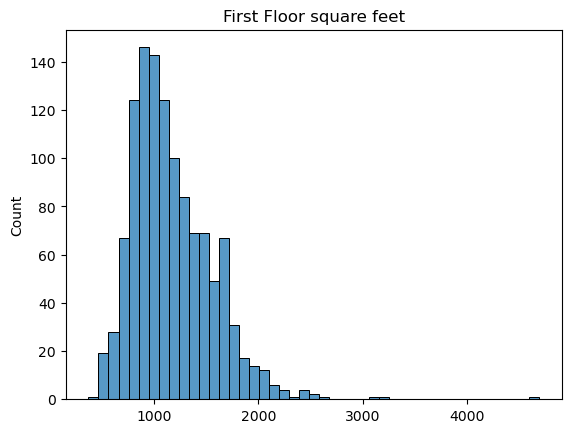

In [71]:
sns.histplot(data=stFLsf).set(title='First Floor square feet')

[Text(0.5, 1.0, 'Total rooms above grade')]

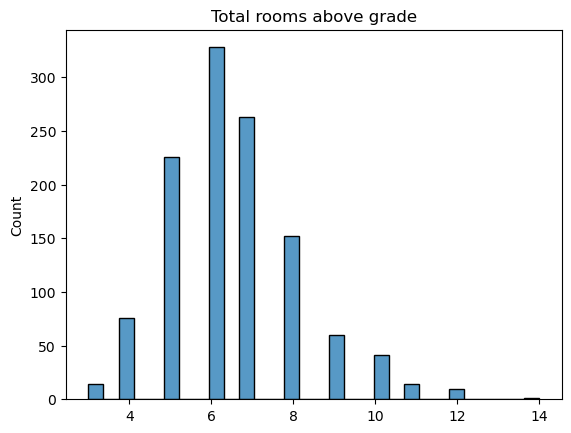

In [72]:
sns.histplot(data=TotalRmsAbvGrd).set(title='Total rooms above grade')

[Text(0.5, 1.0, 'Original construction date')]

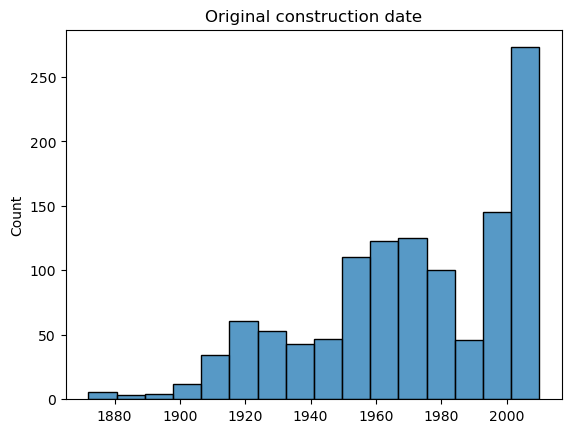

In [73]:
sns.histplot(data=YearBuilt).set(title='Original construction date')

[Text(0.5, 1.0, 'Linear feet of street connected to property')]

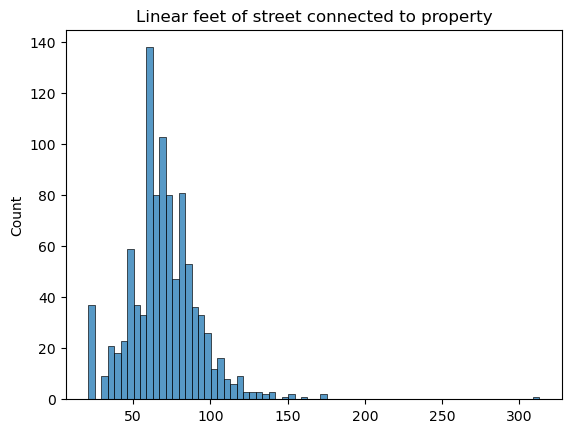

In [74]:
sns.histplot(data=newLotFrontage).set(title='Linear feet of street connected to property')

5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
    con más potencial predictivo es decir las 2 variables que presentan mayor correlación
    entre dicha variable y la variable dependiente

### Calculamos coeficiente de correlacion

In [75]:
#Convierto a un dataframe de pandas dado que en numpy no da un unico coeficiente de correlacion 
df = pd.DataFrame(data_training,columns=['Sale Price','OverallQual','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Sale Price  OverallQual  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       181500.0          6.0    1262.0             6.0     1976.0   
1       140000.0          7.0     961.0             7.0     1915.0   
2       250000.0          8.0    1145.0             9.0     2000.0   
3       143000.0          5.0     796.0             5.0     1993.0   
4       200000.0          7.0    1107.0             7.0     1973.0   
...          ...          ...       ...             ...        ...   
1180    185000.0          7.0    1221.0             6.0     2004.0   
1181    175000.0          6.0     953.0             7.0     1999.0   
1182    210000.0          6.0    2073.0             7.0     1978.0   
1183    266500.0          7.0    1188.0             9.0     1941.0   
1184    142125.0          5.0    1078.0             5.0     1950.0   

      LotFrontage  
0            80.0  
1            60.0  
2            84.0  
3            85.0  
4             NaN  
...           ...  
1180         62.0  

In [76]:
corr1 = df['Sale Price'].corr(df['OverallQual'])    # Coeficiente de Correlacion SalePrice vs OverallQual
corr2 = df['Sale Price'].corr(df['1stFlrSF'])       # Coeficiente de Correlacion SalePrice vs 1stFlrSF
corr3 = df['Sale Price'].corr(df['YearBuilt'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr4 = df['Sale Price'].corr(df['LotFrontage'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr5 = df['Sale Price'].corr(df['TotalRmsAbvGrd'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
print(f"El coeficiente de correlacion entre Sale Price y OverallQual es de: {corr1}")
print(f"El coeficiente de correlacion entre Sale Price y First Floor square feet es de: {corr2}")
print(f"El coeficiente de correlacion entre Sale Price y Year Built es de: {corr3}")
print(f"El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: {corr4}")
print(f"El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: {corr5}")


El coeficiente de correlacion entre Sale Price y OverallQual es de: 0.790030469271033
El coeficiente de correlacion entre Sale Price y First Floor square feet es de: 0.6107157719521666
El coeficiente de correlacion entre Sale Price y Year Built es de: 0.5210126026271633
El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: 0.3696703688035581
El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: 0.5240854942939729


### Graficar x vs y(scatterplot) usando matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

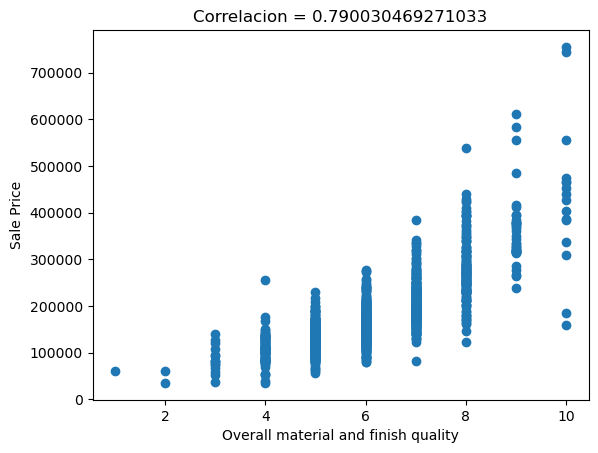

In [77]:
plt.scatter(OverallQual,sale_price)
plt.title(f"Correlacion = {corr1}")
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

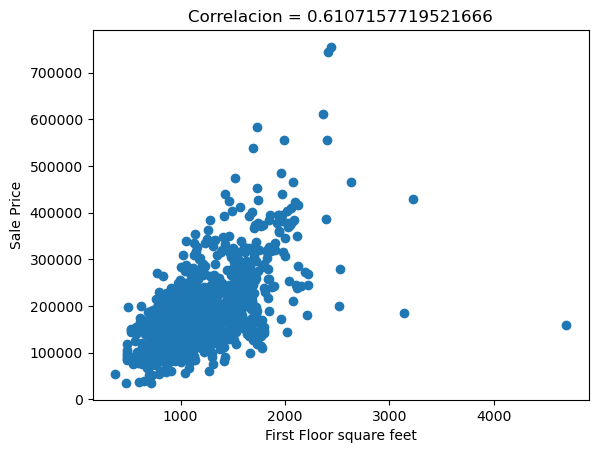

In [78]:
plt.scatter(stFLsf,sale_price)
plt.title(f"Correlacion = {corr2}")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

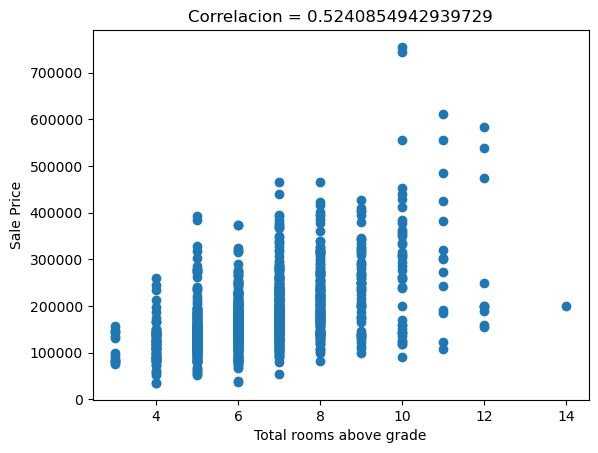

In [79]:
plt.scatter(TotalRmsAbvGrd,sale_price)
plt.title(f"Correlacion = {corr5}")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

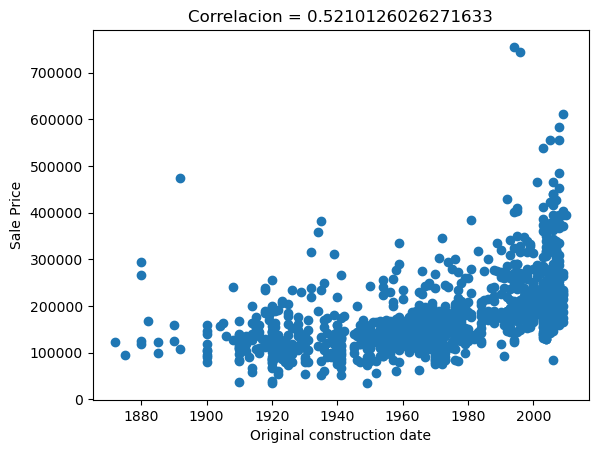

In [80]:
plt.scatter(YearBuilt,sale_price)
plt.title(f"Correlacion = {corr3}")
plt.xlabel("Original construction date")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

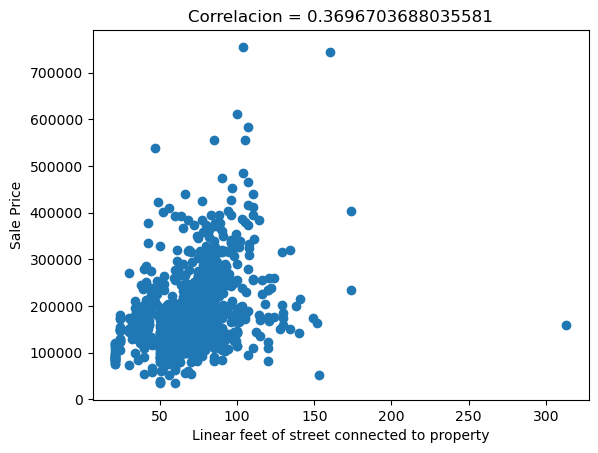

In [81]:
plt.scatter(LotFrontage,sale_price)
plt.title(f"Correlacion = {corr4}")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sale Price")
plt.show

#### Dado las graficas anteriores junto con el coeficiente de correlacion las dos variables con mas potencial predictivo para la variable Sale Price son OverallQual(Overall material and finish quality) y First Floor square feet por lo que los modelos se implementaran en base a estas dos variables 

## Se empieza a trabajar con programacion orientada a objetos

In [82]:
class Modelo:
    def __init__(self,varx,vary,epochs,print_error_every, learning_rate):
        self.varx = varx
        self.vary = vary
        self.epochs = epochs
        self.varaux_x = varx
        self.print_error_every = print_error_every
        self.learning_rate = learning_rate
        self.b1 = 0.1
        self.b0 = 0.2
        self.betas = np.array([self.b1,self.b0])
        vect1 = np.ones_like(self.varx).reshape(-1,1)
        self.varx = np.reshape(self.varx,(-1,1))
        self.A = np.hstack([self.varx,vect1])  
        self.dic_modelos = {}
        self.dic_errores = {}
        self.error = 0
   
    def iter_for_betas(self): #Funcion para encontrar modelo optimo
        for iter in range(self.epochs):
            yEstimada = np.dot(self.A,self.betas) 
            self.error = np.mean(1/2*np.power(yEstimada-self.vary,2)) # Calculo error

            deltas = np.mean(np.multiply(self.A,(yEstimada-self.vary).reshape((-1,1))),axis=0)
            deltas = self.learning_rate*deltas
            self.betas[0] = self.betas[0] - deltas[0]
            self.betas[1] = self.betas[1] - deltas[1]
            #Almacenamos modelo resultante junto con error en cada iteracion, cada uno en su diccionario por separado 
            self.dic_modelos[iter] = [self.betas[0],self.betas[1]]
            self.dic_errores[iter] = self.error
            
            #Instruccion 6.4
            if(iter%self.print_error_every == 0):
                print(f"El error es de: {self.error} para la iteracion: {iter}")
                
    def obtain_last_error(self):
        return self.error
    
    def obtain_last_betas(self):
        return self.betas
    
    def obtain_dict_betas(self):
        return self.dic_modelos
    
    def obtain_dict_errores(self):
        return self.dic_errores
    
    def graph_error_time(self):
        lista_iteraciones1 = list(self.dic_errores.keys())
        lista_error1 = list(self.dic_errores.values())

        plt.plot(lista_iteraciones1,lista_error1)
        plt.ylabel('Error')
        plt.xlabel('Iteraciones')
        plt.title("Error en el transcurso de iteraciones")
        plt.show()

    def graph_models_time(self,n):
        plt.scatter(self.varaux_x,self.vary)
        for i in range(0,self.epochs+1,n):
            plt.plot(self.varaux_x,self.varaux_x*self.dic_modelos[i][0]+self.dic_modelos[i][1])
            
        plt.grid()
        plt.show

    def graph_best_model(self):
         plt.scatter(self.varaux_x,self.vary)
         plt.plot(self.varaux_x, self.varaux_x*self.betas[0]+self.betas[1])
         plt.grid()
         plt.show

    def model_scikit(self):
        model = LinearRegression().fit(self.varaux_x.reshape(-1,1),self.vary)
        return model
    
    def graph_scikit(self,modelo):
         plt.scatter(self.varaux_x,self.vary)
         plt.plot(self.varaux_x, self.varaux_x*modelo.coef_+modelo.intercept_)
         plt.grid()
         plt.show

    def calculate_prediction(self):
        pass

    def train_20_percent(self):
        pass

### Se realiza ciclo para obtener error y betas

In [83]:
Modelo1 = Modelo(OverallQual,sale_price,100001,1000,0.01)
Modelo2 = Modelo(stFLsf,sale_price,261,1,0.00000001)

In [84]:
Modelo1.iter_for_betas()

El error es de: 19769921335.84847 para la iteracion: 0
El error es de: 1331713779.091439 para la iteracion: 1000
El error es de: 1268078178.4329557 para la iteracion: 2000
El error es de: 1243546517.4637163 para la iteracion: 3000
El error es de: 1234089509.3788955 para la iteracion: 4000
El error es de: 1230443812.4149392 para la iteracion: 5000
El error es de: 1229038388.391422 para la iteracion: 6000
El error es de: 1228496594.4065113 para la iteracion: 7000
El error es de: 1228287731.6596296 para la iteracion: 8000
El error es de: 1228207214.6213274 para la iteracion: 9000
El error es de: 1228176175.1298249 para la iteracion: 10000
El error es de: 1228164209.339068 para la iteracion: 11000
El error es de: 1228159596.500986 para la iteracion: 12000
El error es de: 1228157818.2419806 para la iteracion: 13000
El error es de: 1228157132.7193077 para la iteracion: 14000
El error es de: 1228156868.4488428 para la iteracion: 15000
El error es de: 1228156766.5720098 para la iteracion: 1600

In [85]:
Modelo2.iter_for_betas()

El error es de: 19746906371.890217 para la iteracion: 0
El error es de: 19216083393.42868 para la iteracion: 1
El error es de: 18701234425.156277 para la iteracion: 2
El error es de: 18201878762.559563 para la iteracion: 3
El error es de: 17717550166.924656 para la iteracion: 4
El error es de: 17247796430.01914 para la iteracion: 5
El error es de: 16792178951.874004 para la iteracion: 6
El error es de: 16350272331.271368 para la iteracion: 7
El error es de: 15921663968.555552 para la iteracion: 8
El error es de: 15505953680.396807 para la iteracion: 9
El error es de: 15102753326.147871 para la iteracion: 10
El error es de: 14711686445.444576 para la iteracion: 11
El error es de: 14332387906.712065 para la iteracion: 12
El error es de: 13964503566.248547 para la iteracion: 13
El error es de: 13607689937.56815 para la iteracion: 14
El error es de: 13261613870.694252 para la iteracion: 15
El error es de: 12925952241.103807 para la iteracion: 16
El error es de: 12600391648.032206 para la i

In [86]:
beta1 = Modelo1.obtain_last_betas()
beta1

array([  46074.06904017, -100293.20563658])

In [87]:
beta2 = Modelo2.obtain_last_betas()
beta2

array([149.81227424,   0.32426467])

## Comenzamos proceso de graficación

#### Grafico error Modelo 1

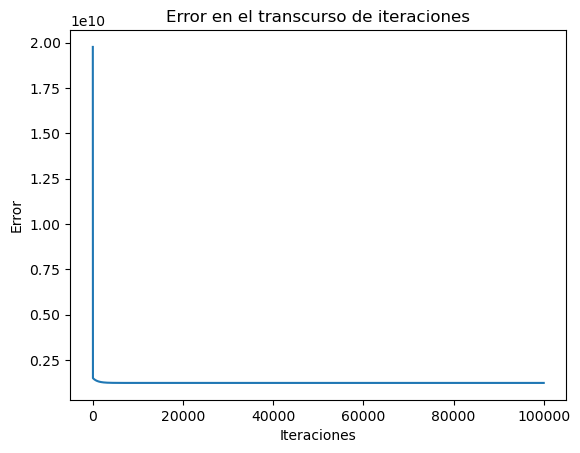

In [88]:
Modelo1.graph_error_time()

#### Grafico error Modelo 2

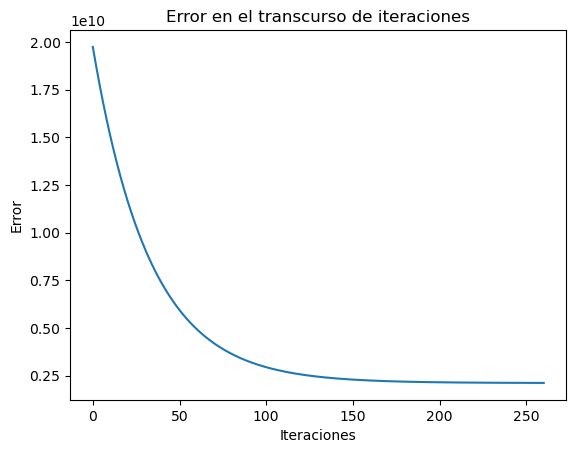

In [89]:
Modelo2.graph_error_time()

##### Grafico los distintos modelos para OverallQual: Overall material and finish quality

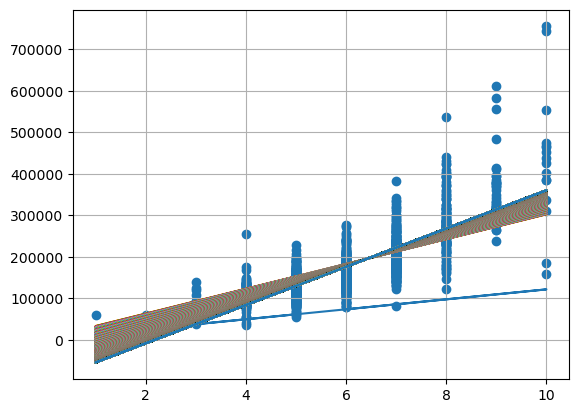

In [90]:
Modelo1.graph_models_time(20)

##### Grafico los distintos modelos para 1stFlrSF: First Floor square feet

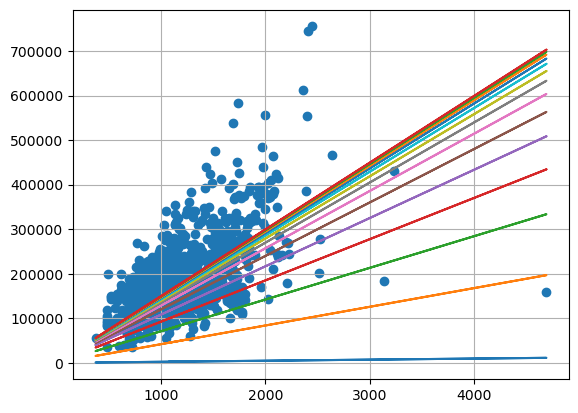

In [91]:
Modelo2.graph_models_time(20)

##### Grafico modelo optimo para OverallQual: Overall material and finish quality

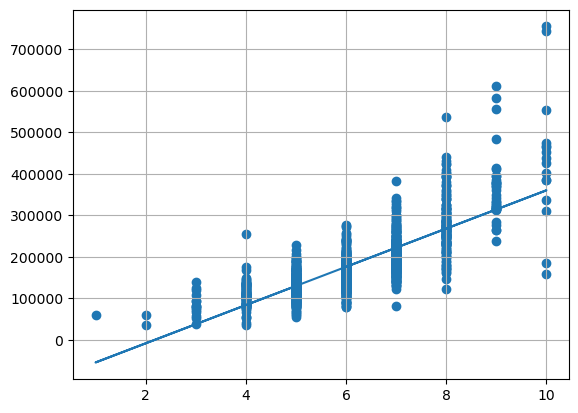

In [92]:
Modelo1.graph_best_model()

##### Graficamos modelo optimo para 1stFlrSF: First Floor square feet

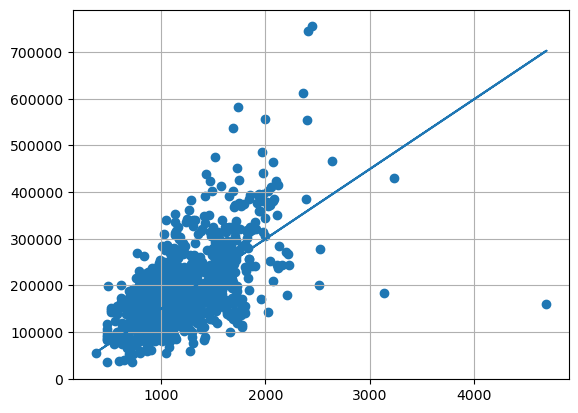

In [93]:
Modelo2.graph_best_model()

array([126.37757208])

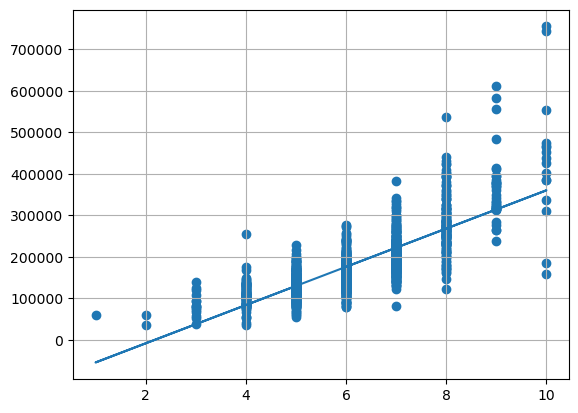

In [95]:
mode = Modelo1.model_scikit()
# Graficamos modelo1 Scikit Learn
Modelo1.graph_scikit(mode)

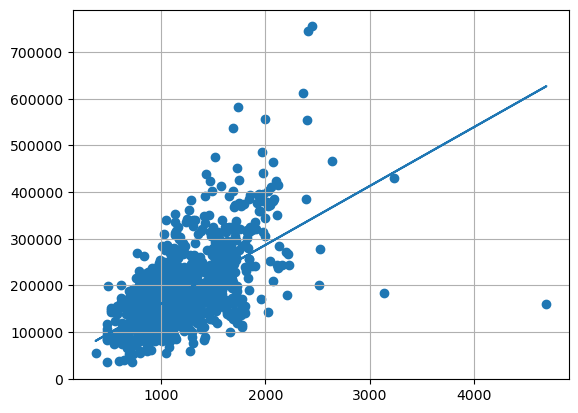

In [96]:
mode2 = Modelo2.model_scikit()
#Graficamos modelo 2 usando scikit_learn
Modelo2.graph_scikit(mode2)